In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import re
from datetime import timedelta, datetime
import datetime
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans
import sklearn.preprocessing
import explore
import prepare
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('accident_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24317 entries, 0 to 24316
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crash_url             24317 non-null  object 
 1   case_id               24256 non-null  object 
 2   crash_id              24317 non-null  int64  
 3   crash_city            24317 non-null  object 
 4   crash_date            24317 non-null  object 
 5   crash_latitude        24317 non-null  float64
 6   crash_longitude       24317 non-null  float64
 7   police_dept           24317 non-null  object 
 8   accident_factor       21356 non-null  object 
 9   speed_limit           24317 non-null  object 
 10  crash_location        24317 non-null  object 
 11  num_of_injuries       24317 non-null  int64  
 12  num_of_vehicles       24317 non-null  int64  
 13  num_of_occupants      24317 non-null  int64  
 14  at_fault              24317 non-null  int64  
 15  car_contained_injur

In [4]:
df.head(10)

,crash_url,case_id,crash_id,crash_city,crash_date,crash_latitude,crash_longitude,police_dept,accident_factor,speed_limit,...,driver_age,driver_gender,driver_ethnicity,driver_residence,driver_car_damage,driver_license_type,driver_license_state,driver_insured,traffic_conditions,weather_conditions
0,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21048075,18151973,"SAN ANTONIO, TX",03/16/21 06:59 PM,29.425363,-98.481582,SAN ANTONIO POLICE DEPARTMENT,The driver of 2007 CADILLAC CHANGED LANE WHEN ...,55 MPH,...,21.0,Female,Hispanic,NaN,FL - FRONT END (LEFT) DAMAGE PARTIAL CONTACT,"Driver license, class c",Texas,Yes,MARKED LANES,CLEAR
1,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21048075,18151973,"SAN ANTONIO, TX",03/16/21 06:59 PM,29.425363,-98.481582,SAN ANTONIO POLICE DEPARTMENT,The driver of 2007 CADILLAC CHANGED LANE WHEN ...,55 MPH,...,33.0,Female,Hispanic,NaN,RBQ - RIGHT BACK QUARTER DAMAGE ANGULAR IMPACT,"Id card, unlicensed",Texas,Yes,MARKED LANES,CLEAR
2,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21048067,18153005,"SAN ANTONIO, TX",03/16/21 06:58 PM,29.568587,-98.384981,SAN ANTONIO POLICE DEPARTMENT,The driver of 2013 TOYOTA FAILED TO YIELD RIGH...,40 MPH,...,58.0,Female,White,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,NONE,CLEAR
3,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21048067,18153005,"SAN ANTONIO, TX",03/16/21 06:58 PM,29.568587,-98.384981,SAN ANTONIO POLICE DEPARTMENT,The driver of 2013 TOYOTA FAILED TO YIELD RIGH...,40 MPH,...,47.0,Male,Hispanic,NaN,RFQ - RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT,"Driver license, class c",Texas,Yes,NONE,CLEAR
4,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21048106,18153831,"SAN ANTONIO, TX",03/16/21 06:50 PM,29.438856,-98.505306,SAN ANTONIO POLICE DEPARTMENT,The driver of 2017 VOLKSWAGEN FOLLOWED TOO CLO...,55 MPH,...,24.0,Female,Hispanic,NaN,FD - FRONT END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,MARKED LANES,CLEAR
5,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21048106,18153831,"SAN ANTONIO, TX",03/16/21 06:50 PM,29.438856,-98.505306,SAN ANTONIO POLICE DEPARTMENT,The driver of 2017 VOLKSWAGEN FOLLOWED TOO CLO...,55 MPH,...,53.0,Male,Black,NaN,BD - BACK END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,MARKED LANES,CLEAR
6,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21058100,18153635,"SAN ANTONIO, TX",03/16/21 06:50 PM,29.396190,-98.499022,SAN ANTONIO POLICE DEPARTMENT,The driver of 2001 PONTIAC DRIVER INATTENTION ...,70 MPH,...,50.0,Male,Hispanic,NaN,BD - BACK END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,CENTER STRIPE/DIVIDER,CLEAR
7,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21058100,18153635,"SAN ANTONIO, TX",03/16/21 06:50 PM,29.396190,-98.499022,SAN ANTONIO POLICE DEPARTMENT,The driver of 2001 PONTIAC DRIVER INATTENTION ...,70 MPH,...,32.0,Female,White,NaN,BD - BACK END DAMAGE DISTRIBUTED IMPACT,"Driver license, class c",Texas,Yes,CENTER STRIPE/DIVIDER,CLEAR
8,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21058100,18153635,"SAN ANTONIO, TX",03/16/21 06:50 PM,29.396190,-98.499022,SAN ANTONIO POLICE DEPARTMENT,The driver of 2001 PONTIAC DRIVER INATTENTION ...,70 MPH,...,NaN,Unknown,Unknown,NaN,UNKNOWN,"Unknown, unknown",NaN,Unknown,CENTER STRIPE/DIVIDER,CLEAR
9,https://vpic.nhtsa.dot.gov/api/vehicles/Decode...,SAPD21048105,18153124,"SAN ANTONIO, TX",03/16/21 06:38 PM,29.435166,-98.690464,SAN ANTONIO POLICE DEPARTMENT,The driver of 2006 CHEVROLET FAULTY EVASIVE AC...,35 MPH,...,18.0,Male,Black,NaN,FR - FRONT END (RIGHT) DAMAGE PARTIAL CONTACT,"Driver license, class c",Texas,Yes,SIGNAL LIGHT,CLEAR


In [5]:
from prepare import clean_collision_data
df = clean_collision_data()
#cross validation on train

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16600 entries, 0 to 24298
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   crash_date              16600 non-null  datetime64[ns]
 1   crash_id                16600 non-null  int64         
 2   crash_latitude          16600 non-null  float64       
 3   crash_longitude         16600 non-null  float64       
 4   crash_occupant_count    16600 non-null  int64         
 5   crash_vehicle_count     16600 non-null  int64         
 6   damage_airbag           16600 non-null  int64         
 7   damage_burned           16600 non-null  int64         
 8   damage_concentrated     16600 non-null  int64         
 9   damage_distributed      16600 non-null  int64         
 10  damage_rollover         16600 non-null  int64         
 11  damage_zone             16600 non-null  int64         
 12  dl_cdl                  16600 non-null  int64 

In [7]:
df.crash_date = df.crash_date.apply(lambda row: pd.to_datetime(row).strftime('%m/%d/%Y %H:%M'))
# extracting date from timestamp
#df['crash_time'] = df.crash_date.apply(lambda row: pd.to_datetime(row).strftime('%H:%M'))

df['crashhr'] = pd.to_datetime(df.crash_date).dt.hour
df['crashhr'] = df.crashhr.astype(str)
#######
df['crashmin'] = pd.to_datetime(df.crash_date).dt.minute
df['crashmin'] = df.crashmin.astype(str)
########
#combining 
df['crash_time_24hr'] = (df.crashhr + '.' + df.crashmin)


#float value to bin time

df['crash_time_24hr'] = df['crash_time_24hr'].astype('float64')

df['crash_date'] = pd.to_datetime(df.crash_date).dt.date
df['crash_date'] = df.crash_date.astype(str)


#dropping several columns
df.drop(columns = {'crashhr', 'crashmin'}, inplace = True)

In [8]:
df.crash_time_24hr.value_counts()

17.00    156
18.00    138
19.00    116
17.30    113
16.00    113
        ... 
6.36       1
6.35       1
2.16       1
2.42       1
4.80       1
Name: crash_time_24hr, Length: 1274, dtype: int64

In [9]:
df['time_frames'] = pd.cut(df.crash_time_24hr, 
                    bins=[0,6,9,12,15,18,24], 
                    include_lowest=False,)

In [10]:
df.time_frames.value_counts()

(18, 24]    4923
(15, 18]    3980
(12, 15]    3035
(9, 12]     1916
(0, 6]      1427
(6, 9]      1291
Name: time_frames, dtype: int64

-------

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=19, stratify=df.injury_class)

In [12]:
train.shape, test.shape

((13280, 42), (3320, 42))

----

In [13]:
def split_X_y(train, test, target):
    '''
    Splits train, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 2 dataframes and 2 series:
    X_train (df) & y_train (series), X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_test, y_test

#scale the data

In [14]:
X_train, y_train, X_test, y_test = split_X_y(train,test,'fault_class')

In [15]:
def scale_data(train, test, scale_type = None, to_scale = None):
    '''
    returns scaled data of specified type into data frame, will
    '''
    train_copy = train.copy()
    test_copy = test.copy()
    
    if to_scale == None:
        return train_copy, test_copy
    
    else:
        X_train = train_copy[to_scale]
        X_test = test_copy[to_scale]
        
        
        min_max_scaler = MinMaxScaler()
        robust_scaler = RobustScaler()
        standard_scaler = StandardScaler()
        
        min_max_scaler.fit(X_train)
        robust_scaler.fit(X_train)
        standard_scaler.fit(X_train)
    
        mmX_train_scaled = min_max_scaler.transform(X_train)
        rX_train_scaled = robust_scaler.transform(X_train)
        sX_train_scaled = standard_scaler.transform(X_train)
    
    
        mmX_test_scaled = min_max_scaler.transform(X_test)
        rX_test_scaled = robust_scaler.transform(X_test)
        sX_test_scaled = standard_scaler.transform(X_test)
    
    
        mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
        mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)

        rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
        rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)


        sX_train_scaled = pd.DataFrame(sX_train_scaled, columns=X_train.columns)
        sX_test_scaled = pd.DataFrame(sX_test_scaled, columns=X_test.columns)
    
    
    if scale_type == 'MinMax':
        for i in mmX_train_scaled:
            train_copy[i] = mmX_train_scaled[i].values
            test_copy[i] = mmX_test_scaled[i].values
    elif scale_type == 'Robust':
        for i in rX_train_scaled:
            train_copy[i] = rX_train_scaled[i].values
            test_copy[i] = rX_test_scaled[i].values
    elif scale_type == 'Standard':
          for i in sX_train_scaled:
            train_copy[i] = sX_train_scaled[i].values
            test_copy[i] = sX_test_scaled[i].values
    return train_copy, test_copy

In [16]:
train_scaled, test_scaled = scale_data(X_train, X_test, scale_type = 'Standard', to_scale = ['crash_longitude','crash_latitude'])

In [17]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = split_X_y(train_scaled, test_scaled, 'injury_class')

In [18]:
X_train_scaled.describe()

,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,damage_rollover,...,fault_distraction,fault_fatigue,fault_intoxication,fault_maneuver,fault_speed,fault_yield,injury_crash_total,vehicle_occupant_count,vehicle_year,crash_time_24hr
count,1.328000e+04,1.328000e+04,1.328000e+04,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,...,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000,13280.000000
mean,1.822707e+07,3.603552e-15,6.004651e-16,2.857530,2.163102,0.196235,0.000527,0.112575,0.377108,0.007756,...,0.363102,0.028163,0.032229,0.397892,0.144503,0.028163,0.457455,1.389307,2012.221084,14.473381
std,9.108771e+04,1.000038e+00,1.000038e+00,1.659474,0.806570,0.397163,0.022954,0.316085,0.484681,0.087729,...,0.480912,0.165444,0.176614,0.489481,0.351612,0.165444,0.874106,0.832599,6.185627,5.547449
min,1.810882e+07,-3.472410e+00,-1.924472e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1982.000000,0.000000
25%,1.815748e+07,-6.662898e-01,-7.267838e-01,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,11.240000
50%,1.819483e+07,7.449549e-02,-4.896382e-02,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,15.400000
75%,1.825386e+07,7.285460e-01,6.718339e-01,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2017.000000,18.400000
max,1.841344e+07,2.002154e+00,2.579486e+00,24.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,21.000000,2022.000000,23.900000


In [19]:
X_train_scaled.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_distraction', 'fault_fatigue', 'fault_intoxication',
       'fault_maneuver', 'fault_narrative', 'fault_speed', 'fault_yield',
       'injury_crash_total', 'vehicle_color', 'vehicle_id', 'vehicle_make',
       'vehicle_occupant_count', 'vehicle_type', 'vehicle_year',
       'crash_time_24hr', 'time_frames'],
      dtype='object')

In [20]:
cat_vars = ['damage_airbag','damage_burned', 'damage_concentrated', 'damage_distributed',
            'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
            'dl_class_m', 'dl_unlicensed', 'driver_male',
            'fault_distraction', 'fault_fatigue', 'fault_intoxication',
            'fault_maneuver','fault_speed', 'fault_yield']
quant_vars = ['crash_time_24hr','vehicle_occupant_count','injury_crash_total','factors_spd_lmt_mph','driver_age','crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count']

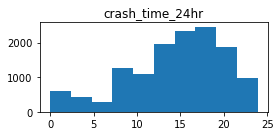

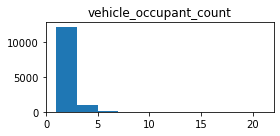

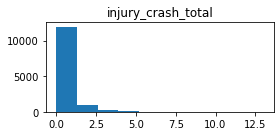

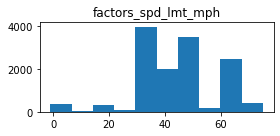

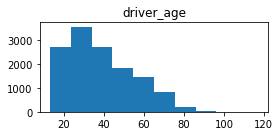

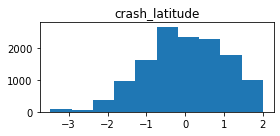

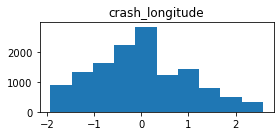

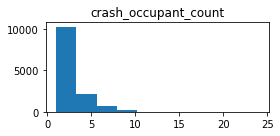

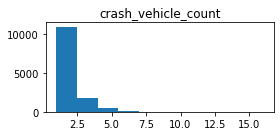

In [21]:
for col in X_train_scaled[quant_vars]:
    plt.figure(figsize=(4,2))
    plt.hist(X_train_scaled[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

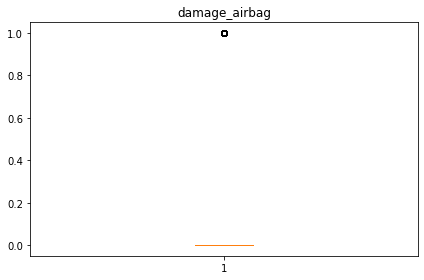

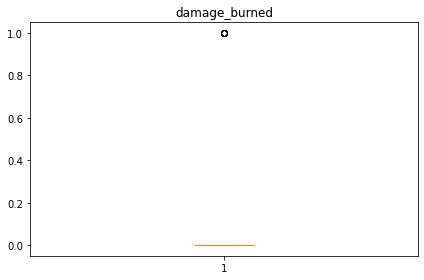

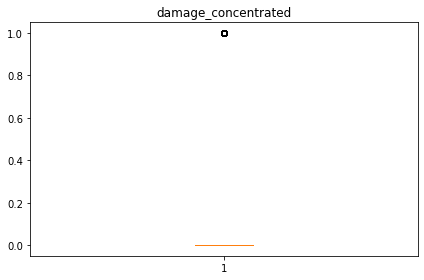

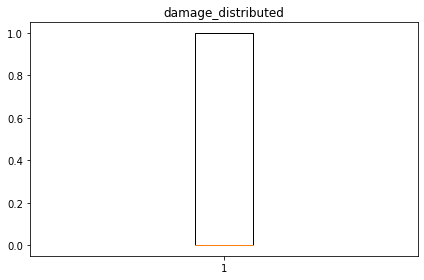

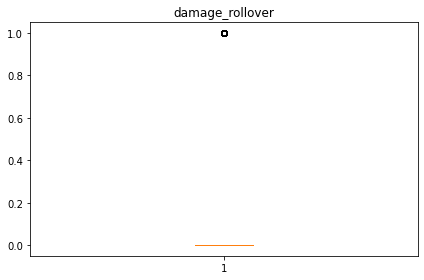

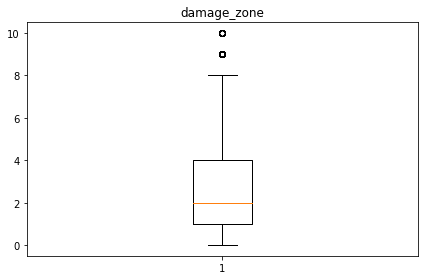

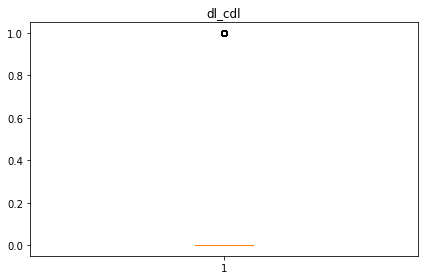

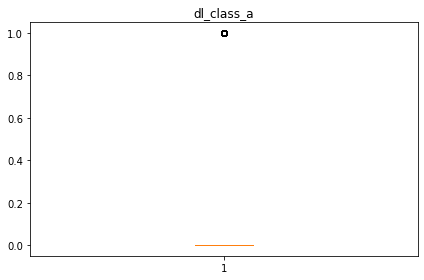

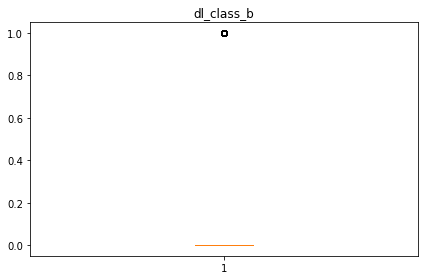

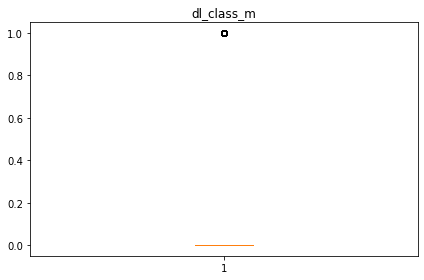

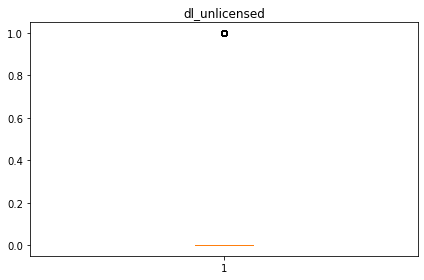

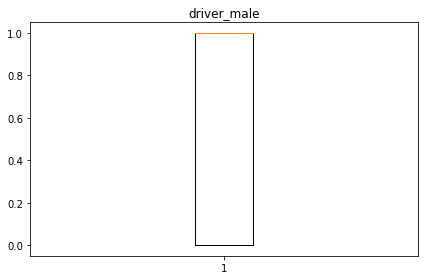

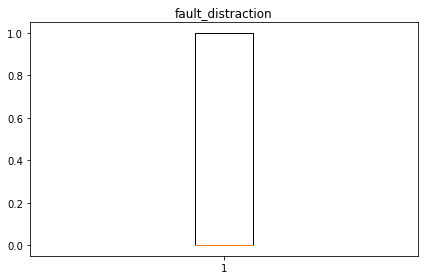

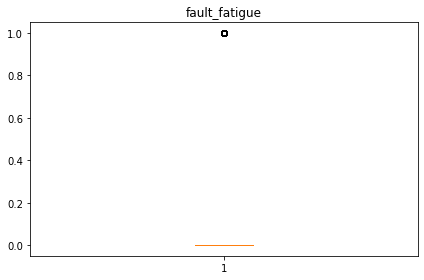

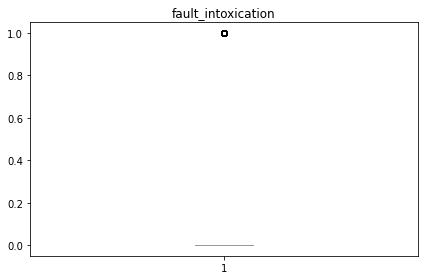

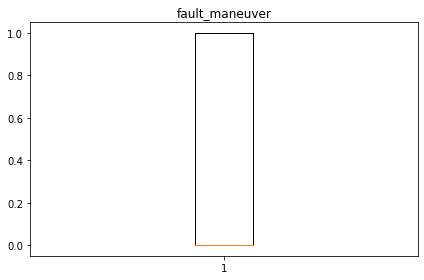

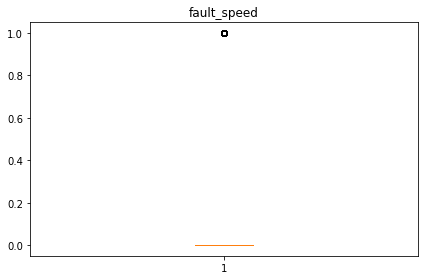

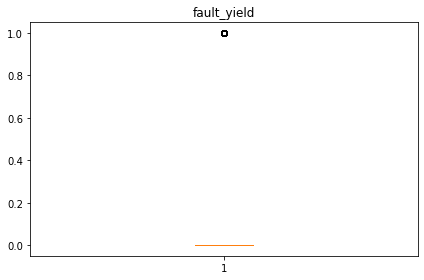

In [22]:
for col in X_train_scaled[cat_vars]:
    plt.figure(figsize=(6,4))
    plt.boxplot(X_train_scaled[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

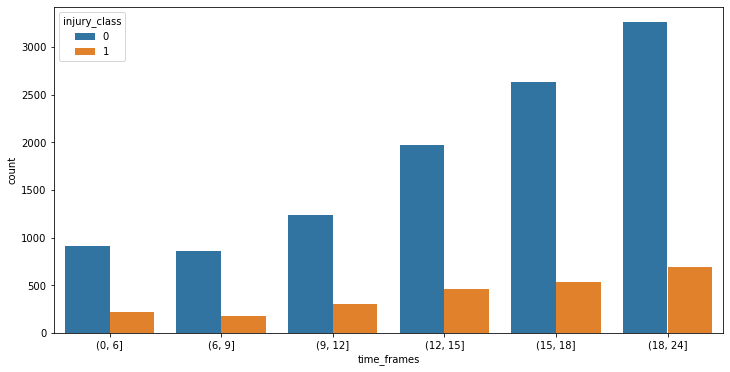

In [23]:
explore.discrete_var_visual('time_frames',X_train,hue = 'injury_class' )

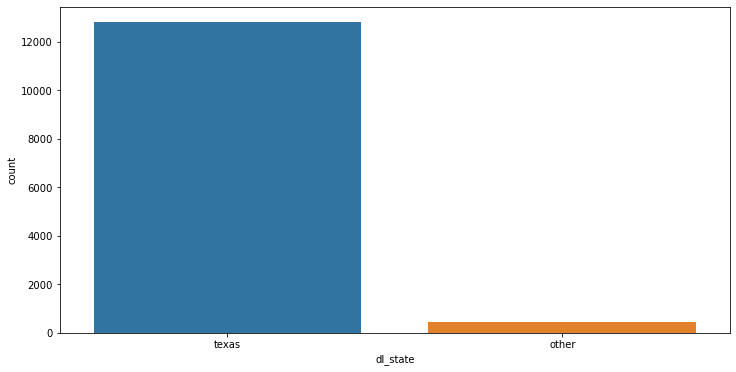

In [24]:
explore.discrete_var_visual('dl_state',X_train)

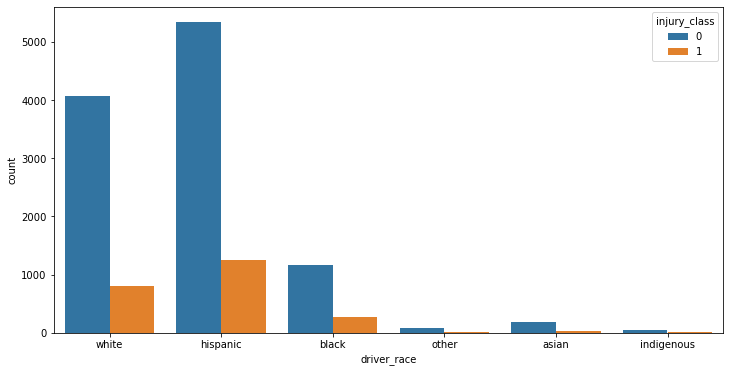

In [25]:
explore.discrete_var_visual('driver_race',X_train,hue = 'injury_class')

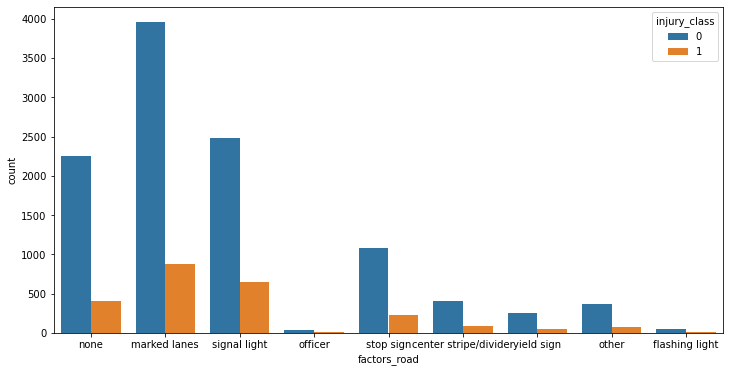

In [26]:
explore.discrete_var_visual('factors_road',train,hue = 'injury_class')

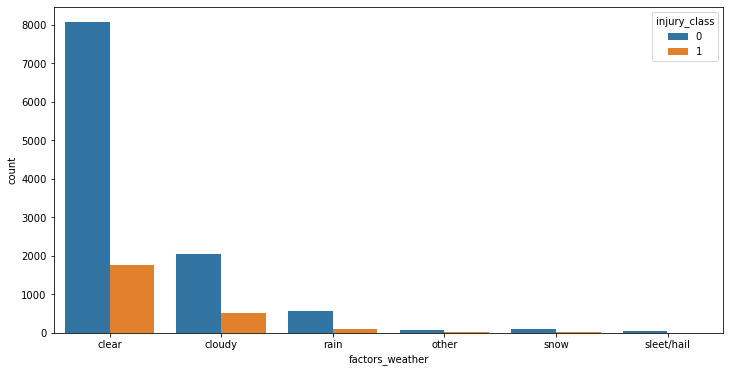

In [27]:
explore.discrete_var_visual('factors_weather',train,hue = 'injury_class')

In [28]:
'vehicle_make','vehicle_type', 'vehicle_year', 'time_frames'

('vehicle_make', 'vehicle_type', 'vehicle_year', 'time_frames')

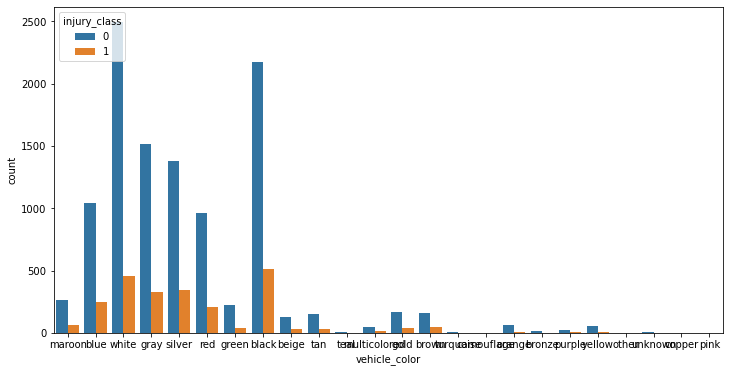

In [29]:
explore.discrete_var_visual('vehicle_color',train,hue = 'injury_class')

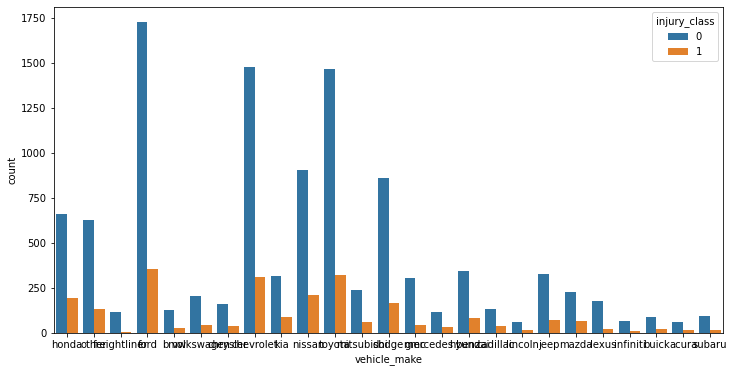

In [30]:
explore.discrete_var_visual('vehicle_make',train,hue = 'injury_class')

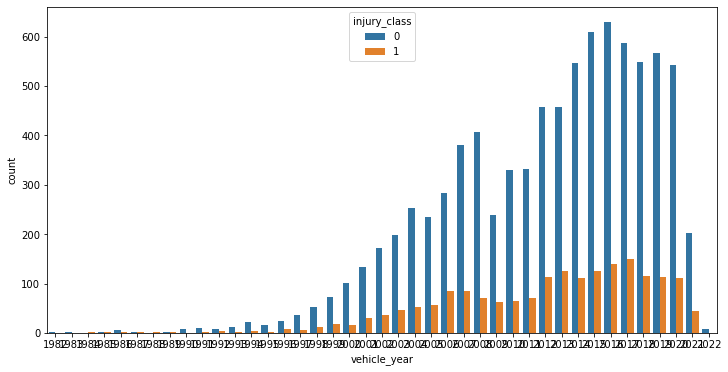

In [34]:
explore.discrete_var_visual('vehicle_year',train, hue = 'injury_class')

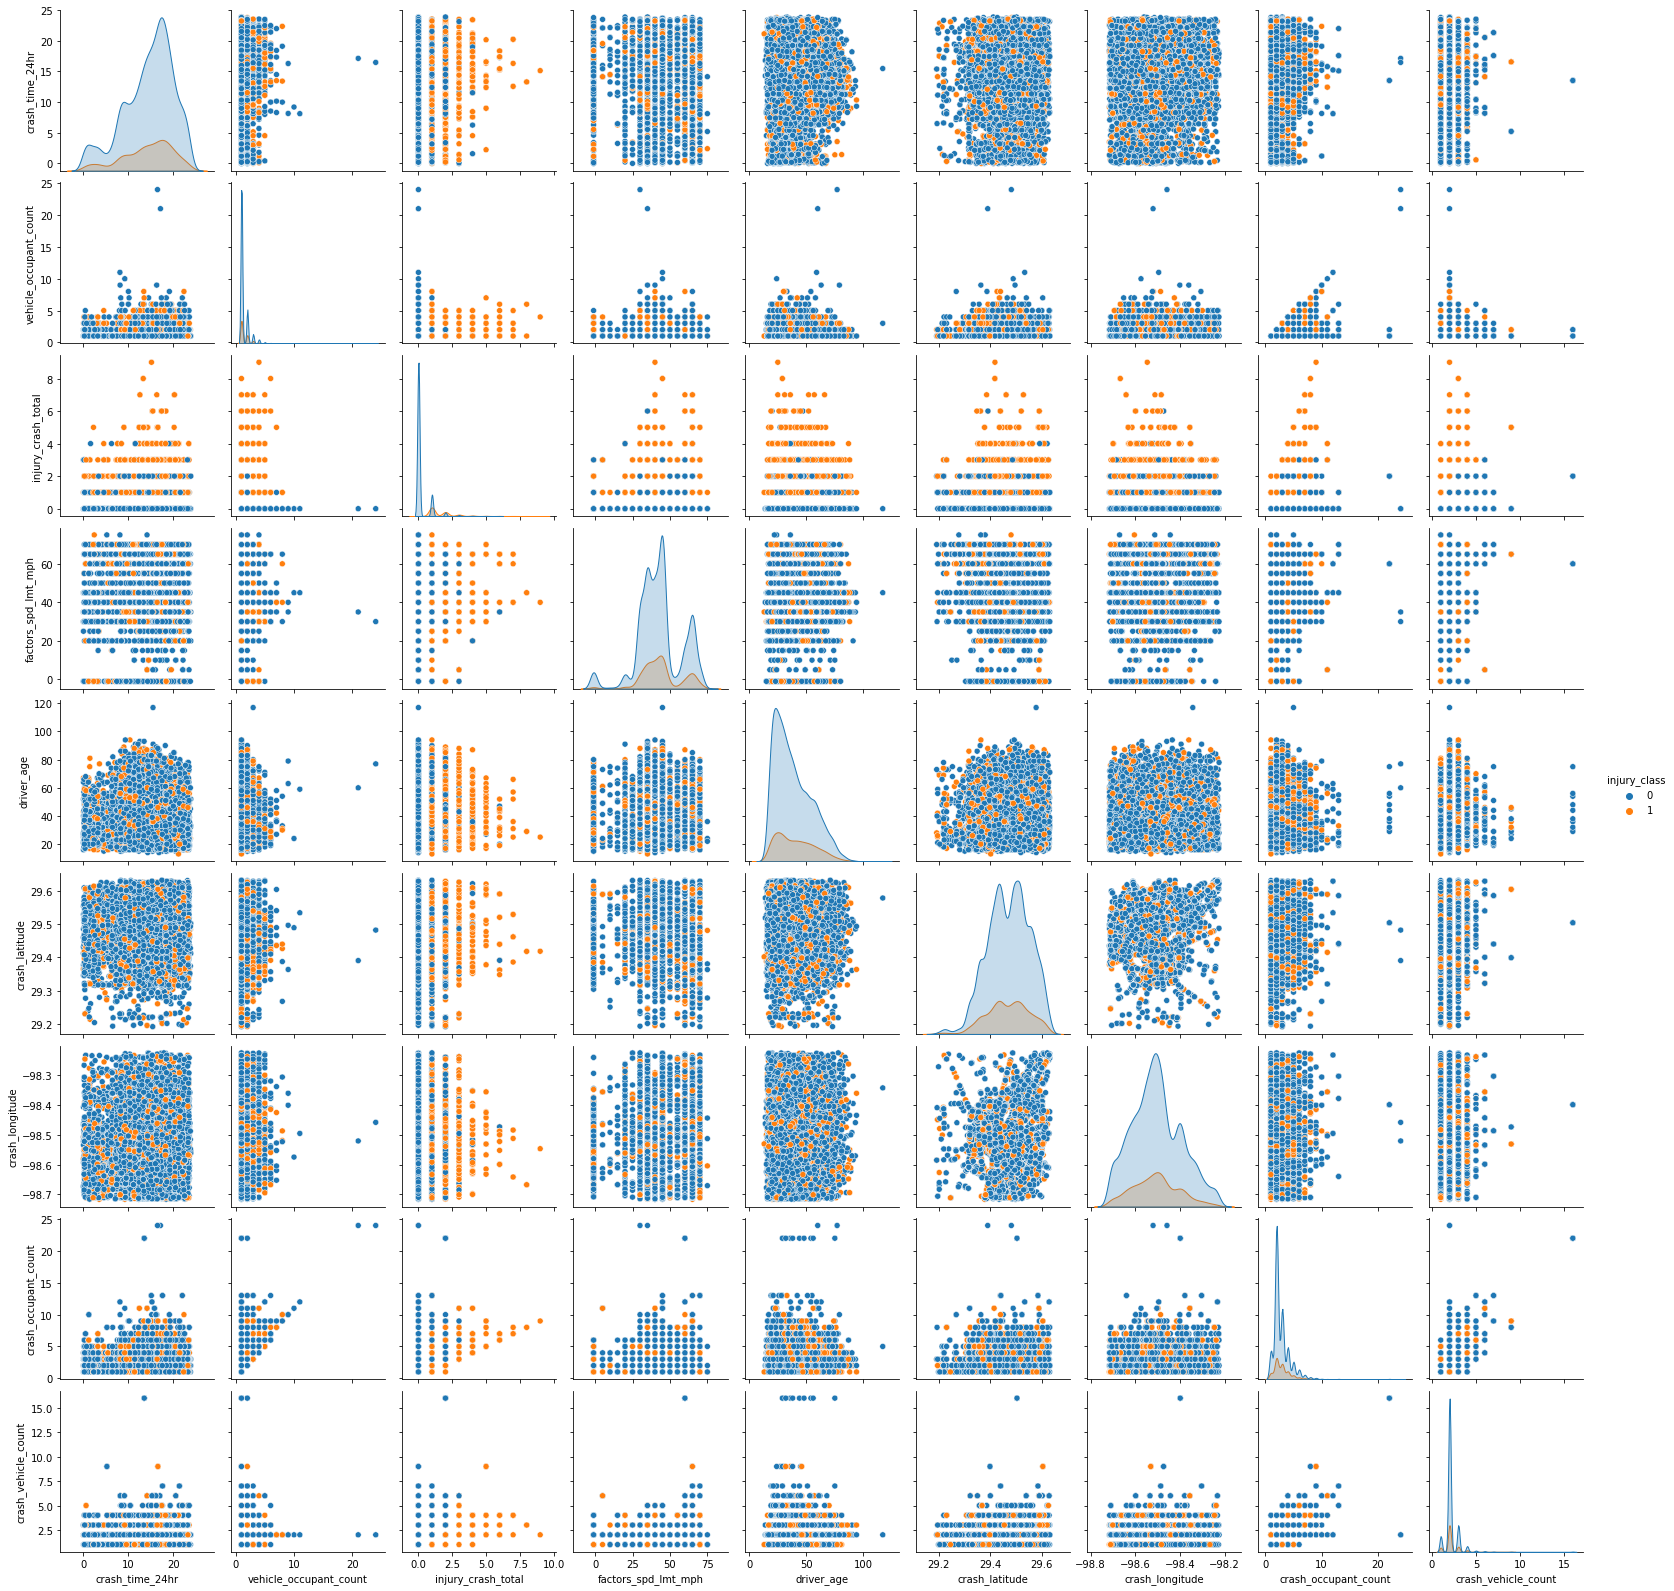

In [47]:
sns.pairplot(data=train, vars=quant_vars, hue ='injury_class')
plt.show()

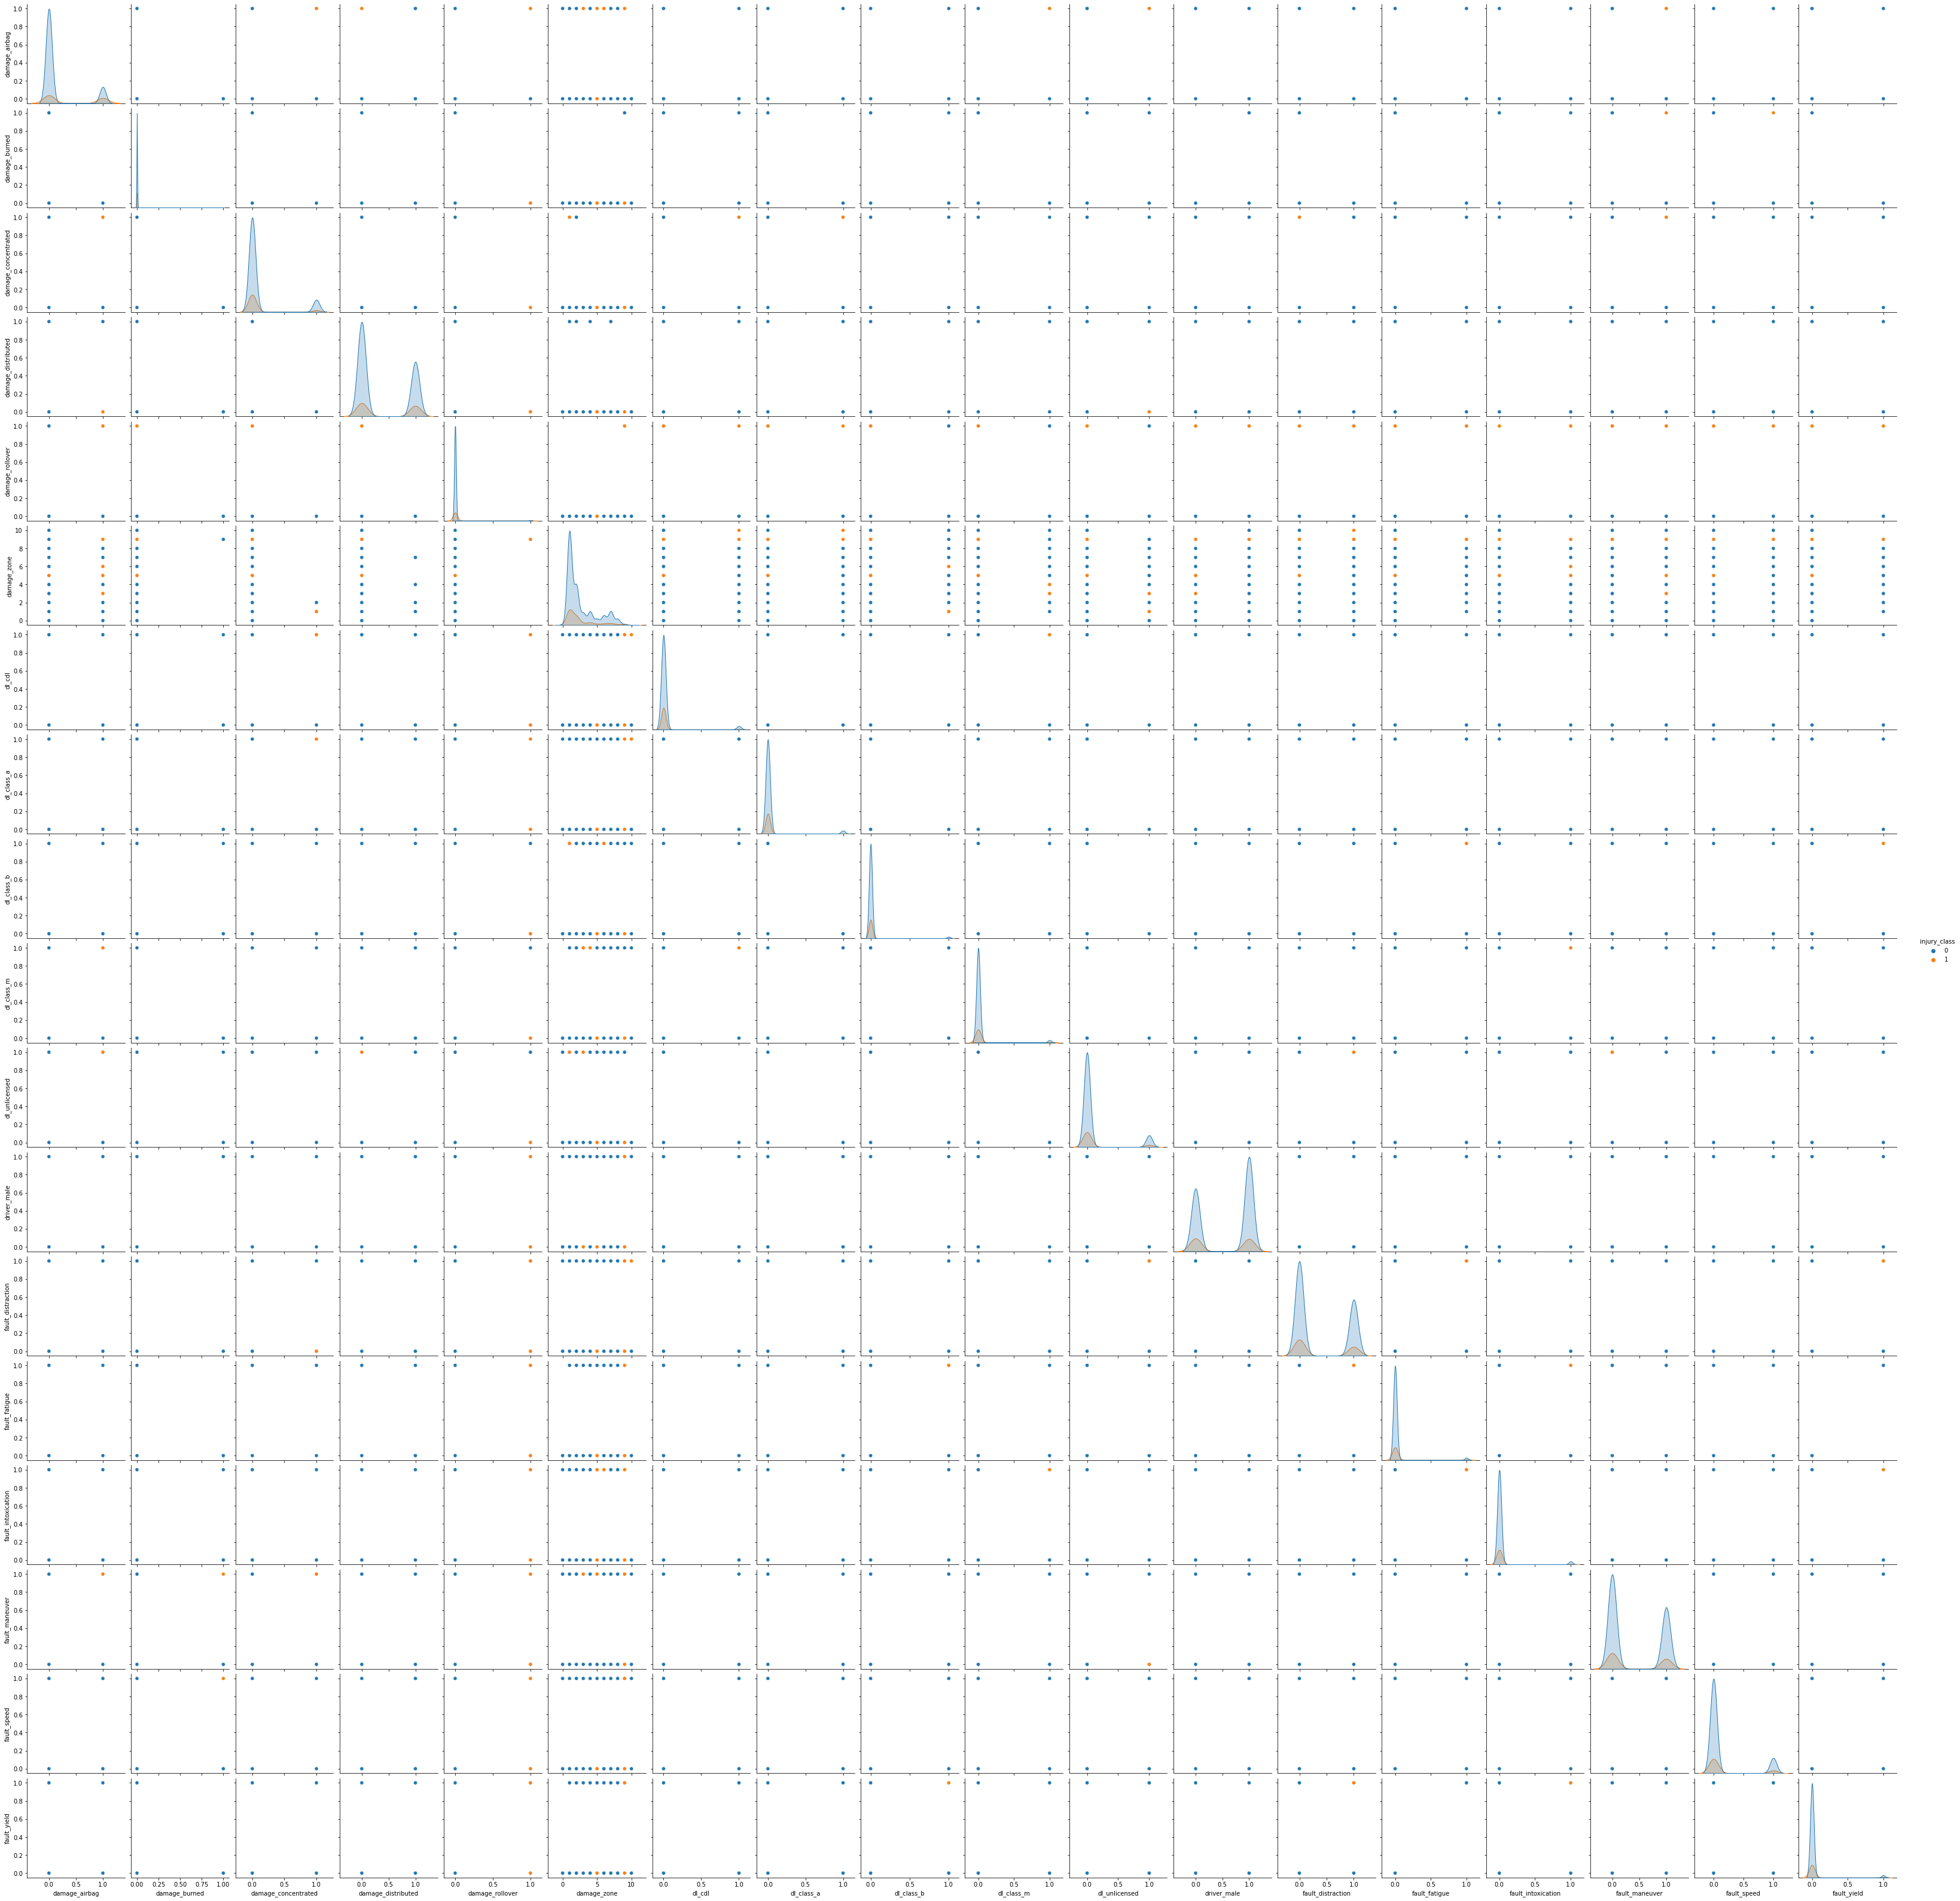

In [48]:
sns.pairplot(data=train, vars=cat_vars, hue ='injury_class')
plt.show()

In [ ]:
#are males at fault because of distraction during weather conditions of rain more likely to be injured than females because of distraction during weather conditiions of rain.

In [152]:
train.groupby(['fault_distraction', 'factors_road']).injury_class.value_counts(normalize = True)

fault_distraction  factors_road           injury_class
0                  center stripe/divider  0               0.833910
                                          1               0.166090
                   flashing light         0               0.806452
                                          1               0.193548
                   marked lanes           0               0.819291
                                          1               0.180709
                   none                   0               0.840749
                                          1               0.159251
                   officer                0               0.769231
                                          1               0.230769
                   other                  0               0.807432
                                          1               0.192568
                   signal light           0               0.792717
                                          1               0.207283
       

In [153]:
train.groupby(['fault_distraction', 'factors_weather']).injury_class.value_counts(normalize = True)

fault_distraction  factors_weather  injury_class
0                  clear            0               0.818346
                                    1               0.181654
                   cloudy           0               0.802593
                                    1               0.197407
                   other            0               0.884615
                                    1               0.115385
                   rain             0               0.856540
                                    1               0.143460
                   sleet/hail       0               0.902439
                                    1               0.097561
                   snow             0               0.890000
                                    1               0.110000
1                  clear            0               0.827197
                                    1               0.172803
                   cloudy           0               0.790805
                                    

In [155]:
train.groupby(['vehicle_type','factors_weather']).injury_class.value_counts(normalize = True)

vehicle_type   factors_weather  injury_class
bus            clear            0               0.848485
                                1               0.151515
               cloudy           0               0.947368
                                1               0.052632
               other            0               1.000000
               rain             0               1.000000
               sleet/hail       0               1.000000
car            clear            0               0.802475
                                1               0.197525
               cloudy           0               0.775311
                                1               0.224689
               other            0               0.785714
                                1               0.214286
               rain             0               0.838384
                                1               0.161616
               sleet/hail       0               0.785714
                                1          

In [97]:
df.groupby(['fault_yield','factors_weather' ]).injury_class.value_counts(normalize = True)

fault_yield  factors_weather  injury_class
0            clear            0               0.823202
                              1               0.176798
             cloudy           0               0.804160
                              1               0.195840
             other            0               0.834951
                              1               0.165049
             rain             0               0.859712
                              1               0.140288
             sleet/hail       0               0.852459
                              1               0.147541
             snow             0               0.897059
                              1               0.102941
1            clear            0               0.747283
                              1               0.252717
             cloudy           0               0.709302
                              1               0.290698
             other            0               1.000000
             rain     

In [128]:
df.groupby(['fault_yield','factors_road']).injury_class.value_counts(normalize = True)

fault_yield  factors_road           injury_class
0            center stripe/divider  0               0.817717
                                    1               0.182283
             flashing light         0               0.849315
                                    1               0.150685
             marked lanes           0               0.821551
                                    1               0.178449
             none                   0               0.844657
                                    1               0.155343
             officer                0               0.809524
                                    1               0.190476
             other                  0               0.849638
                                    1               0.150362
             signal light           0               0.796759
                                    1               0.203241
             stop sign              0               0.824283
                                    

In [100]:
df.groupby(['fault_yield','fault_distraction']).injury_class.value_counts(normalize = True)

fault_yield  fault_distraction  injury_class
0            0                  0               0.823335
                                1               0.176665
             1                  0               0.820232
                                1               0.179768
1            0                  0               0.715134
                                1               0.284866
             1                  0               0.797203
                                1               0.202797
Name: injury_class, dtype: float64

In [108]:
df.groupby(['time_frames', 'vehicle_color' ]).injury_class.value_counts(normalize = True).head(45)

time_frames  vehicle_color  injury_class
(0, 6]       beige          0               0.769231
                            1               0.230769
             black          0               0.836013
                            1               0.163987
             blue           0               0.748092
                            1               0.251908
             bronze         0               0.666667
                            1               0.333333
             brown          0               0.950000
                            1               0.050000
             gold           0               0.833333
                            1               0.166667
             gray           0               0.815166
                            1               0.184834
             green          0               0.807692
                            1               0.192308
             maroon         0               0.785714
                            1               0.214286
     

In [123]:
df4 = pd.DataFrame(df.groupby(['time_frames', 'vehicle_color' ]).injury_class.value_counts(normalize = True)).head(50)

In [132]:
df4.head(50)

injury_class
time_frames vehicle_color injury_class              
(0, 6]      beige         0                 0.769231
                          1                 0.230769
            black         0                 0.836013
                          1                 0.163987
            blue          0                 0.748092
                          1                 0.251908
            bronze        0                 0.666667
                          1                 0.333333
            brown         0                 0.950000
                          1                 0.050000
            gold          0                 0.833333
                          1                 0.166667
            gray          0                 0.815166
                          1                 0.184834
            green         0                 0.807692
                          1                 0.192308
            maroon        0                 0.785714
                          1                 0.214286
            multicolored  0                 0.600000
                          1                 0.400000
            orange        0                 1.000000
            other         0                 1.000000
            purple        0                 1.000000
            red           0                 0.776224
                          1                 0.223776
            silver        0                 0.806452
                          1                 0.193548
            tan           0                 0.850000
                          1                 0.150000
            turquoise     0                 0.750000
                          1                 0.250000
            unknown       0                 1.000000
            white         0                 0.788396
                          1                 0.211604
            yellow        0                 0.666667
                          1                 0.333333
(6, 9]      beige         0                 0.545455
                          1                 0.454545
            black         0                 0.774436
                          1                 0.225564
            blue          0                 0.878261
                          1                 0.121739
            bronze        0                 1.000000
            brown         0                 0.800000
                          1                 0.200000
            copper        0                 1.000000
            gold          0                 0.733333
                          1                 0.266667
            gray          0                 0.857143
                          1                 0.142857

In [151]:
#appears if you failed to yield between 15:00-24:00 and it is raining you have a higher chance of being injured during an accident than if you did yield
df.groupby(['time_frames', 'factors_weather', 'fault_yield']).injury_class.value_counts(normalize = True)[70:140]

time_frames  factors_weather  fault_yield  injury_class
(15, 18]     clear            0            1               0.170660
                              1            0               0.753247
                                           1               0.246753
             cloudy           0            0               0.834965
                                           1               0.165035
                              1            0               0.833333
                                           1               0.166667
             other            0            0               0.769231
                                           1               0.230769
             rain             0            0               0.878788
                                           1               0.121212
                              1            0               0.666667
                                           1               0.333333
             sleet/hail       0            0               0

In [150]:
df.groupby(['time_frames', 'vehicle_color','']).injury_class.value_counts(normalize = True)[0:50]

time_frames  fault_yield  vehicle_color  injury_class
(0, 6]       0            beige          0               0.769231
                                         1               0.230769
                          black          0               0.836735
                                         1               0.163265
                          blue           0               0.758333
                                         1               0.241667
                          bronze         0               0.500000
                                         1               0.500000
                          brown          0               0.950000
                                         1               0.050000
                          gold           0               0.812500
                                         1               0.187500
                          gray           0               0.815000
                                         1               0.185000
                      